In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [73]:
dataset = {
    'color' : ['Red', 'Blue', 'Red', 'Blue','Red', 'Blue','Blue','Red', 'Blue', 'Blue'],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [173]:
dataset = {
    'color' : ['Red', 'green', 'Red', 'Blue','Red', 'green','Blue','Red', 'Blue', 'green'],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [176]:
data = pd.DataFrame(dataset)

In [178]:
data

,color,target
0,Red,1
1,green,0
2,Red,1
3,Blue,0
4,Red,1
5,green,0
6,Blue,0
7,Red,1
8,Blue,0
9,green,1


In [143]:
ohe = OneHotEncoder(sparse = False)

In [145]:
ohe.fit_transform(data[['color']])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [147]:
encoded_data = ohe.fit_transform(data[['color']])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [149]:
encoded_data

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [155]:
ohe.get_feature_names_out()

array(['color_Blue', 'color_Red', 'color_green'], dtype=object)

In [157]:
tree = DecisionTreeClassifier(criterion='entropy',)

In [159]:
tree.fit(encoded_data, data['target'] )

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'color_green <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1')]

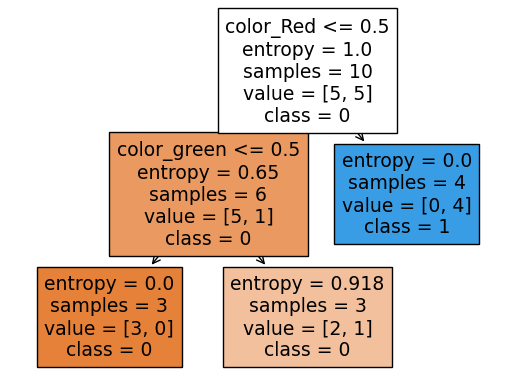

In [161]:
plot_tree(tree, feature_names = ohe.get_feature_names_out(),class_names = ['0','1'], filled = True)

In [259]:
dataset = {
    'color' : ['Red', 'green', 'Red', 'Blue','Red', 'green','Blue','Red', 'Blue', 'green'],
    'Size' : ['Small', 'Large', 'Medium','Small', 'Large', 'Medium','Small', 'Large', 'Medium','Large' ],
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [261]:
data = pd.DataFrame(dataset)

In [263]:
ohe = OneHotEncoder(sparse = False)
encoded_data = ohe.fit_transform(data[['color','Size']])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [265]:
column_name = ohe.get_feature_names_out()

In [267]:
encoded_df = pd.DataFrame(encoded_data, columns=column_name)

In [269]:
final_data = pd.concat([encoded_df, data[['Weight','target']]], axis = 1)

In [271]:
final_data

,color_Blue,color_Red,color_green,Size_Large,Size_Medium,Size_Small,Weight,target
0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.0,0.0,1.0,1.0,0.0,0.0,2,0
2,0.0,1.0,0.0,0.0,1.0,0.0,4,1
3,1.0,0.0,0.0,0.0,0.0,1.0,1,0
4,0.0,1.0,0.0,1.0,0.0,0.0,3,1
5,0.0,0.0,1.0,0.0,1.0,0.0,2,0
6,1.0,0.0,0.0,0.0,0.0,1.0,4,0
7,0.0,1.0,0.0,1.0,0.0,0.0,5,1
8,1.0,0.0,0.0,0.0,1.0,0.0,3,0
9,0.0,0.0,1.0,1.0,0.0,0.0,2,1


In [273]:
X = final_data.drop(columns = 'target')

In [275]:
y = final_data['target']

In [277]:
tree = DecisionTreeClassifier()

In [279]:
tree.fit(X,y)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'Size_Large <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1')]

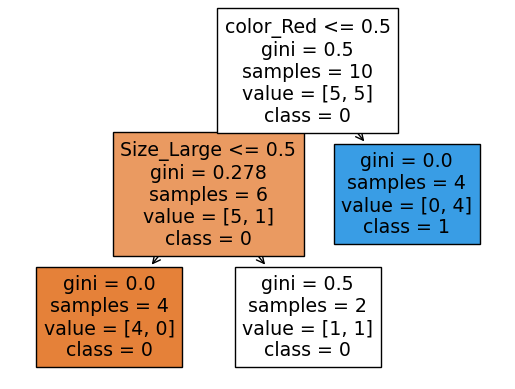

In [281]:
plot_tree(tree, feature_names = X.columns.values,class_names = ['0','1'], filled = True)

In [284]:
tree.feature_importances_

array([0.        , 0.83333333, 0.        , 0.16666667, 0.        ,
       0.        , 0.        ])

In [286]:
tree.feature_names_in_

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small', 'Weight'], dtype=object)

<Axes: >

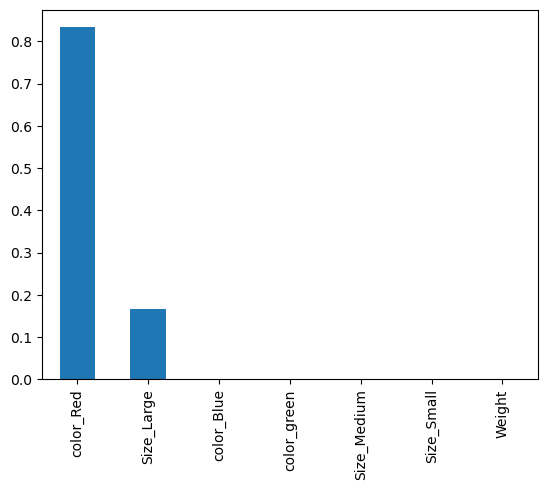

In [300]:
pd.Series(tree.feature_importances_, index=tree.feature_names_in_).sort_values(ascending=False).plot(kind = 'bar')

In [245]:
dataset = {
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

data = pd.DataFrame(dataset)

In [253]:
tree = DecisionTreeClassifier(criterion='entropy')

In [255]:
tree.fit(data[['Weight']], data['target'])

DecisionTreeClassifier(criterion='entropy')

[Text(0.625, 0.875, 'Weight <= 4.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.5, 0.625, 'Weight <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.25, 0.375, 'Weight <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0'),
 Text(0.125, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.75, 0.375, 'Weight <= 3.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.875, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1')]

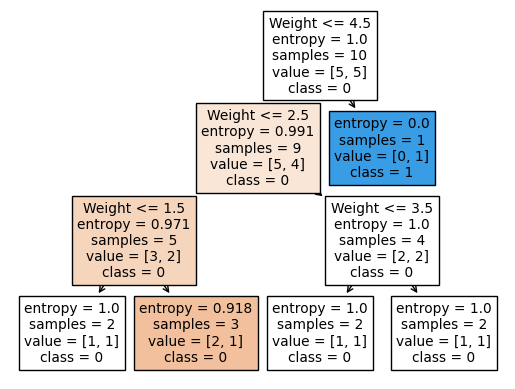

In [257]:
plot_tree(tree, feature_names = ['Weight'],class_names = ['0','1'], filled = True)